# cifar10 - Image Classification with CNN

## First things... first (intro)
According to WikiPedia...

(Signalling is mine)

*The **CIFAR-10 dataset** (CIFAR stands for Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for **machine learning research**. The CIFAR-10 dataset contains 60,000 32x32 color images in **10 different classes**.The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.*


There a lot of NN architectures out there, reaching out a (really) good performance. You can find [HERE](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130) useful papers that lead to great results for several datasets. Famous NN architectures like ResNet, AlexNet etc. have been applied to score a great accuracy.

I could say that my CNN model is kinda shallow, but having 4GB Ram and a 2,26 GHz Intel Core 2 Duo processor, the only thing you can do is...just be patient :)


### Why CNN?

It's not in the scope of this project to expalin in depth how a Convolutional Neural Network works! There is bunch of articles, tutorials and papers to read! However, I will post some sources where I found useful information.

If a MOOC is too big (or boring) for you to understand the intuition of CNNs, here is a really great source, with notes of Stanford Univerity, from an expert. 

-> [Notes](http://cs231n.github.io/convolutional-networks/)

from the author

-> [Andrej Karpathy](http://karpathy.github.io)


Otherwise, towardsdatascience.com, kdnuggets.com and analyticsvidhya.com provide plenty of info and knowledge! Good Read!

## Body

My idea is to write down the code while I will explain what I am doing (sic)

I did choose to work with keras(2.1.2) using tensorflow(1.5.0) backend. Here is [keras documentation](https://keras.io). The interesting fact is that **keras** can work **alongside sci-kit learn** in order to preprocess data, evaluate and tune our NN. So this makes our life easier!

In [1]:
# import basic stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import keras

import keras
import keras.backend as K

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# import data

from keras.datasets import cifar10

In [4]:
# The Sequential model is a linear stack of layers
from keras.models import Sequential

# import keras layers
from keras.layers import (Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization)

# import optimizer
from keras.optimizers import Adam

# some utils for encoding
from keras.utils import to_categorical

# stop training when a monitored quantity has stopped improving.
from keras.callbacks import EarlyStopping


### till here
- CNN:

If we are looking for some pattern or some feature in our data, but don't know where exactly might be in our data, a CNN can scan our data and find those patterns for us, wherever they might be.

CNN is just taking a source image (or source data of any sort), breaking it up into little chunks called convolutions, and then we assemble those and look for patterns at increasingly higher complexities, at higher levels, in our NN.

- Sequential model: We can create a Sequential model by passing a list of layer instances to the constructor. Moreover, the model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.

- First layer: Conv2D / This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
(check documentation for its parameters)

- MaxPooling2D : Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting.

- Dropout: Randomly "killing" some of the nodes for 1 training iteration (epoch).

- Batch Normalization: Regularization technique. Normalize the activations of the previous layer at each batch.

- Flatten: Flattens the input. Does not affect the batch size. (converts a matrix to a vector)

### Images / Data
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

<img src="cifar10_plot.png"/>

In [5]:
# load train/test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

50.000 , 32x32 pixels, colored images (3 is for RGB)

In [7]:
x_test.shape

(10000, 32, 32, 3)

**Reshape Colored Images**

RGB (Red, Green, Blue) are 8 bit each. The range for each individual colour is 0-255 (as 2^8 = 256 possibilities). The combination range is 255x255x255.

By dividing by 255, the 0-255 range can be described with a **0.0 - 1.0 range** where 0.0 means 0 and 1.0 means 255.

In [8]:
# few pixels
x_train[0,1,0]

array([16, 20, 20], dtype=uint8)

In [9]:
# input normalization / step by step

x_train = x_train.reshape((-1,32,32,3))
x_test = x_test.reshape((-1,32,32,3))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train[0,1,0]

array([0.0627451 , 0.07843138, 0.07843138], dtype=float32)

In [11]:
type(x_train[0,1,0,1])

numpy.float32

In [12]:
y_train.shape

(50000, 1)

In [13]:
for i in range(0,5):
    print(y_train[i])

[6]
[9]
[9]
[4]
[1]


**keras.utils.to_categorical(y, num_classes)**  is an **one_hot_encoder**.

Converts a class vector (integers) to binary class matrix.

parameters:

y: class vector to be converted into a matrix (integers from 0 to num_classes)

num_classes: total number of classes. (In our case we got 10 classes)

In [14]:
# encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [16]:
# constructor
model = Sequential()

# passing a list of layer instances to the constructor
# input layer
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.3))

# hidden layers
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.3))

model.add(Flatten())

# fully connected layers
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation = 'softmax'))


Instructions for updating:
keep_dims is deprecated, use keepdims instead


A few words about architecture and argumets. We always need an input and an output layer no matter what. The intermediate layers, called hidden layers, can be as much as we want. The bigger the number of hidden layers, the deeper the network is. I use [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) as an activation funtion (for non-linear transformations) that decides to fire the neuron or not. Kerner_size is the size of "window-filter" (in pixels) that I want to scan the image looikng for patterns. Padding layer is padding the input volume with zeros in such way that the Conv layer does not alter the spatial dimensions of the input. MaxPool is an operation for spatial data. It picks the max value of every filter and puts it in a new matrix. Pool size has two integer factors by which to downscale the image (vertical, horizotial). Finaly, ['softmax'](https://en.wikipedia.org/wiki/Softmax_function) converts each of the final weights that come out of our NN into a probability.

Read "Layer Sizing Patterns" paragraph from Andrej's Karpathy notes.


**Attention**

*Batch Normalization (BN) before or after Activation layer?* Sergey Ioffe and Christian Szegedy, in their paper ["Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift"](https://arxiv.org/abs/1502.03167) suggest to use BN before the activation layer (relu). But there is a conflict on the web about that. According to keras documentation and keras-team github forum there is a suggestion to use BN after activation functions (post from Francois Chollet, author of keras).




**The most important hyper-parameter for our model, to converge to an optimal minima, is the learning rate**. What is leanring rate? Is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. I have to spend a lot of lines to explain how a good learning rate helps our model to be trained and achieve a goog accuracy. Fortunately, there are a lot of great articles doing that for me. Sharing is caring! Check the links below!

Back to Learning Rate. I chose to work with **Cyclic Learning Rate**. Instead of monotonically decreasing the learning rate, this method lets the learning rate cyclically vary between reasonable boundary values. Training with cyclical learning rates instead of fixed values achieves improved classification accuracy without a need to tune and often in fewer iterations.

I found an interesting github repo from which I borrowed the CLR module "clr_callback.py"
_________________
(Cyclic) Learning Rate links:
1. https://arxiv.org/abs/1506.01186
2. https://github.com/bckenstler/CLR
3. https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10
4. https://techburst.io/improving-the-way-we-work-with-learning-rate-5e99554f163b

In [17]:
# configure the model for training
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
from clr_callback import *

In [19]:
# default : base_lr = 0.001, max_lr = 0.006, step_size = 2000

clr = CyclicLR(mode = 'triangular2')

In [20]:
results = model.fit(x_train, y_train,
          batch_size = 50,
          verbose = 2,
          epochs = 20,
          validation_split = 0.2,
          validation_data = (x_test, y_test),
          shuffle = True,
          callbacks=[EarlyStopping(monitor='val_loss', patience = 5), clr]
          )


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 1252s - loss: 1.7718 - acc: 0.3878 - val_loss: 1.5367 - val_acc: 0.5003
Epoch 2/20
 - 1264s - loss: 1.2402 - acc: 0.5643 - val_loss: 1.2818 - val_acc: 0.5510
Epoch 3/20
 - 1275s - loss: 0.9751 - acc: 0.6589 - val_loss: 1.0153 - val_acc: 0.6458
Epoch 4/20
 - 1273s - loss: 0.8027 - acc: 0.7228 - val_loss: 0.6669 - val_acc: 0.7705
Epoch 5/20
 - 1269s - loss: 0.7254 - acc: 0.7497 - val_loss: 0.6728 - val_acc: 0.7678
Epoch 6/20
 - 1260s - loss: 0.7555 - acc: 0.7413 - val_loss: 0.9141 - val_acc: 0.6953
Epoch 7/20
 - 1253s - loss: 0.7164 - acc: 0.7542 - val_loss: 0.6962 - val_acc: 0.7601
Epoch 8/20
 - 1254s - loss: 0.6146 - acc: 0.7873 - val_loss: 0.5482 - val_acc: 0.8094
Epoch 9/20
 - 1281s - loss: 0.5603 - acc: 0.8078 - val_loss: 0.5623 - val_acc: 0.8090
Epoch 10/20
 - 1255s - loss: 0.5703 - acc: 0.8041 - val_loss: 0.5939 - val_acc: 0.7964
Epoch 11/20
 - 1254s - loss: 0.5587 - acc: 0.8071 - val_loss: 0.5396 - val_acc: 0.8116
Ep

In [21]:
# evaluate the model
print("Train acc (%): ", model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test acc (%): ", model.evaluate(x_test, y_test, batch_size=128)[1]*100)


50000/50000 [==============================] - 400s 8ms/step
Train acc (%):  93.1239999961853
10000/10000 [==============================] - 78s 8ms/step
Test acc (%):  83.50999999999999


In [22]:
print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100 - model.evaluate(x_test, y_test, batch_size=128)[1]*100)


50000/50000 [==============================] - 387s 8ms/step
Train error (%):  6.876000003814696
10000/10000 [==============================] - 78s 8ms/step
Test error (%):  16.49000000000001


In [23]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)


In [24]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [25]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.88      0.81      0.84      1000
          1       0.94      0.91      0.92      1000
          2       0.82      0.71      0.76      1000
          3       0.81      0.58      0.68      1000
          4       0.74      0.88      0.80      1000
          5       0.76      0.81      0.78      1000
          6       0.76      0.95      0.84      1000
          7       0.89      0.87      0.88      1000
          8       0.88      0.93      0.91      1000
          9       0.91      0.91      0.91      1000

avg / total       0.84      0.84      0.83     10000



In [26]:
# another way
pred_classes = model.predict_classes(x_test, verbose=1)

10000/10000 [==============================] - 69s 7ms/step


In [27]:
print(classification_report(y_test_class, pred_classes))

             precision    recall  f1-score   support

          0       0.88      0.81      0.84      1000
          1       0.94      0.91      0.92      1000
          2       0.82      0.71      0.76      1000
          3       0.81      0.58      0.68      1000
          4       0.74      0.88      0.80      1000
          5       0.76      0.81      0.78      1000
          6       0.76      0.95      0.84      1000
          7       0.89      0.87      0.88      1000
          8       0.88      0.93      0.91      1000
          9       0.91      0.91      0.91      1000

avg / total       0.84      0.84      0.83     10000



Few thougts about results and metrics. "model.evaluate()" gives a different accuracy on training data from the one in training process. Evaluation gives **93.12%** accuracy but the latest accuracy score of training process is 86.84%. However, test accuracy score is stable and equal to **83.5%**. An (interesting?) explanation about this is that it's due to the dropout layers. During the training phase neurons are dropped. In contrast during the prediction all neurons remain in the network structure. So it's quite likely that the results will be different.You can see it directly from the results for the validation data. They are equal, because both results are generated in the same way!

### Error Analysis

Two different metrics, generate two different scores (93.1% & 83.5% accuracy). What's in the background of these numbers? 

- Case A:  
93.1% accuracy on training set. This means 6.9% **train error**. Furthermore, it means we got 6.9% **Bias**. 16.5% error on test set means that we got **Variance** equal to 9,6 % (Test error - Bias (%)). We conclude that model kinda overfits data. It cannot generalize well on test set. Low Biaw / High Variance.

- Case B:
86.8% accuracy on training set. This means 13.2% **train error** and at the same time 13.2% **Bias**. Error on test set remains stable and equal to 16.5%. **Variance** equal to 3.2% (Test error - Bias (%)). Now we got underfitting, because there is high bias and low variance.

#### How to reduce Bias and Variance 
Bias-Variance trade-off

- Increase the model size
We can increase the number of neurons or hidden layers. Attention to variance, we have to use regularization techniques (L1, L2, Dropout).

- Modify model architecture
This technique can affect both bias and variance.

- Add more training data
...But cifar10 has a standard size of images...


#### Some Plots

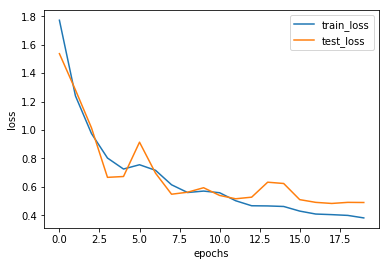

In [28]:
# loss
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])
plt.show()

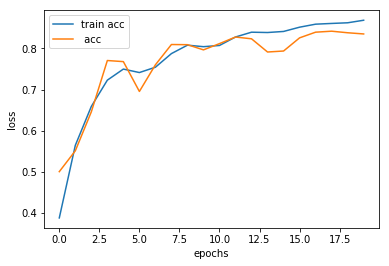

In [29]:
# accuracy
plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train acc', ' acc'])
plt.show()

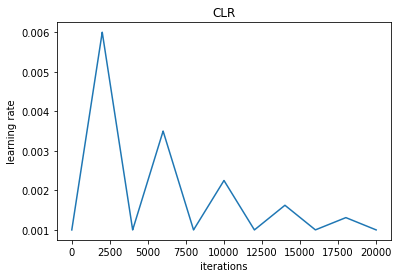

In [30]:
# cyclic learning rates with stepsize 2000 irterations

plt.plot(clr.history['iterations'], clr.history['lr'])
plt.xlabel('iterations')
plt.ylabel('learning rate')
plt.title('CLR')
plt.show()

## Epilogue

Due to constraints on hardware capabilities I could only run 20 epochs with a patinece of 5 ( it could be 3 as well). This took place about 8-9 hours. I would like to mention that If the number of epochs was bigger (eg. 150), results would definitely be better. At least we could have a better view of the model.

Hope you had a good read, and had a chance to check links provided!